<a href="https://colab.research.google.com/github/Nikhil1601/black_friday_sales-data-analysis-and-predection/blob/main/black_friday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset Information**
This dataset comprises of sales transactions captured at a retail store. It’s a classic dataset to explore and expand your feature engineering skills and day to day understanding from multiple shopping experiences. This is a regression problem. The dataset has 550,069 rows and 12 columns.



# **Problem**
**    To predict purchase amount**

# **Attributes:**
Dataset has 537577 rows (transactions) and 12 columns (features) as described below:
*   User_ID:- Unique ID of the user.There are a total of 5891 users in the dataset.
*   Product_ID:- Unique ID of the product.There are total of 3623 products in the dataset.
*   Age:- indicates the age groups of the person making the transcation.
*   Gender:- indicates the gender of the person making the transction F for female and M for male.
*   City_Category:- User's living city cateogary, categorized into 3 'A','B',& 'C'.
*   Occupation:- indicates the occupation of the user,labeled with numbers from 0 to 20
*   Maritial_status:- is 0 if unmarried and 1 contrarily.
*   Product_cateogory_1_t0_3:- Cateogray of product.All three are labaled with numbers.
*   Stay_in_current_city_in_years:- Indicates how long the user has lived in this city.
*   Purchase:- Purchase amount.








In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# **Importing modules and loading dataset**

In [5]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
d=pd.read_csv('/content/gdrive/My Drive/black_friday_train/train.csv')

In [7]:
d.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [8]:
d.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [9]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [10]:
d.apply(lambda x:len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

# **Data Analysis**

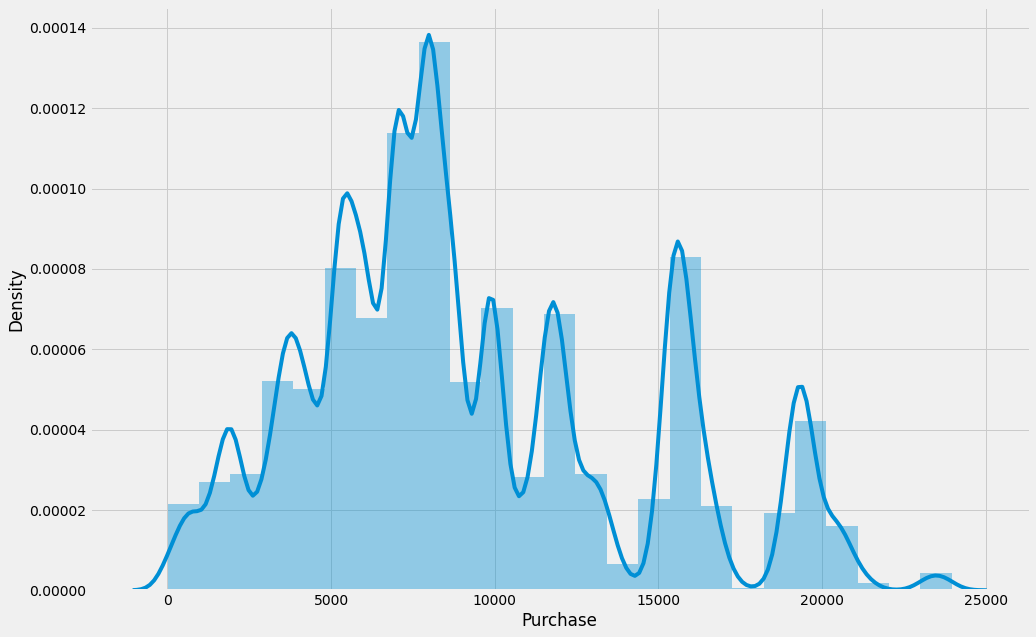

In [11]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,10))
sns.distplot(d['Purchase'], bins=25)

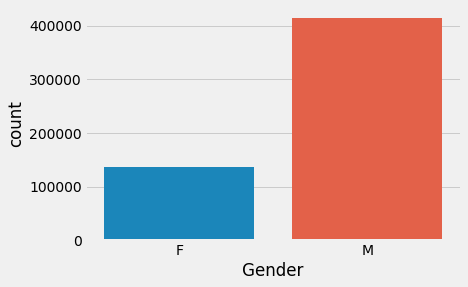

In [12]:
sns.countplot(d['Gender'])

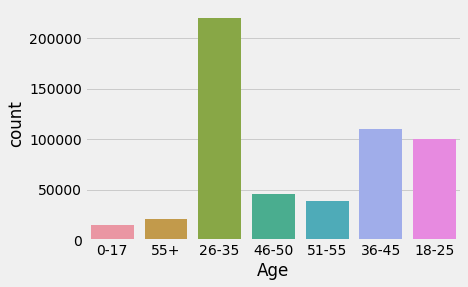

In [13]:
sns.countplot(d['Age'])

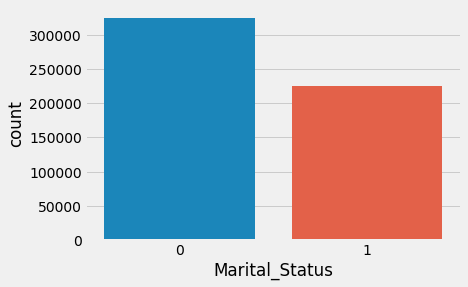

In [14]:
sns.countplot(d['Marital_Status'])

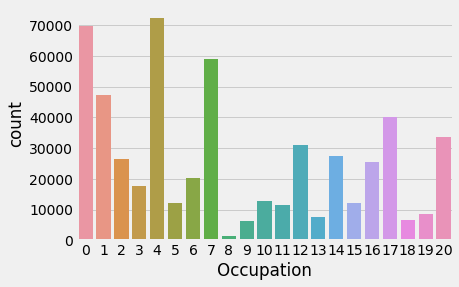

In [15]:
sns.countplot(d['Occupation'])

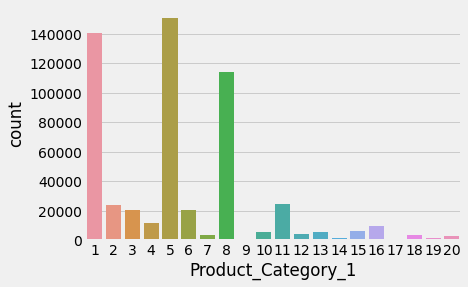

In [16]:
sns.countplot(d['Product_Category_1'])

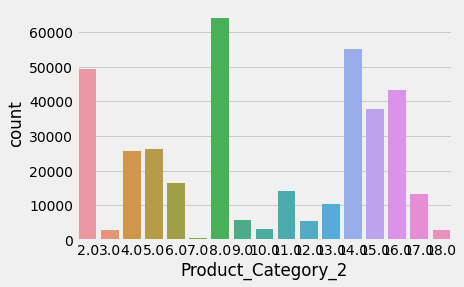

In [17]:
sns.countplot(d['Product_Category_2'])

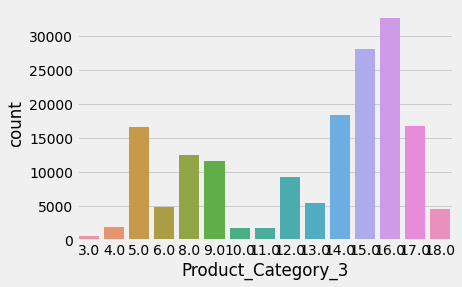

In [18]:
sns.countplot(d['Product_Category_3'])

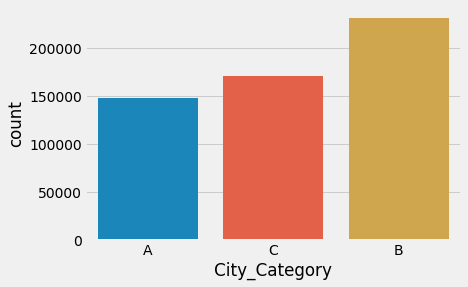

In [19]:
sns.countplot(d['City_Category'])

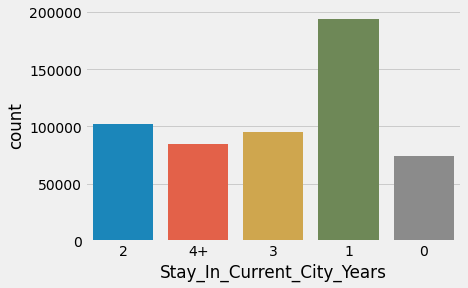

In [20]:
sns.countplot(d['Stay_In_Current_City_Years'])

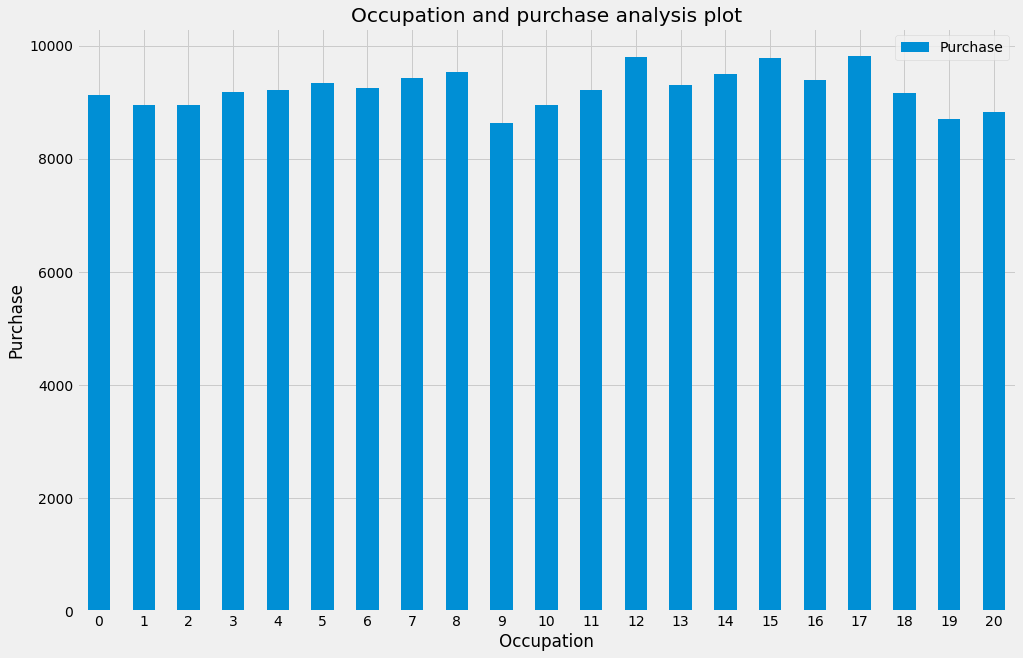

In [21]:
occupation_purchase =d.pivot_table(index='Occupation',values='Purchase',aggfunc=np.mean)
occupation_purchase.plot(kind='bar',figsize=(15,10))
plt.xlabel('Occupation')
plt.ylabel('Purchase')
plt.title('Occupation and purchase analysis plot')
plt.xticks(rotation=0)
plt.show()

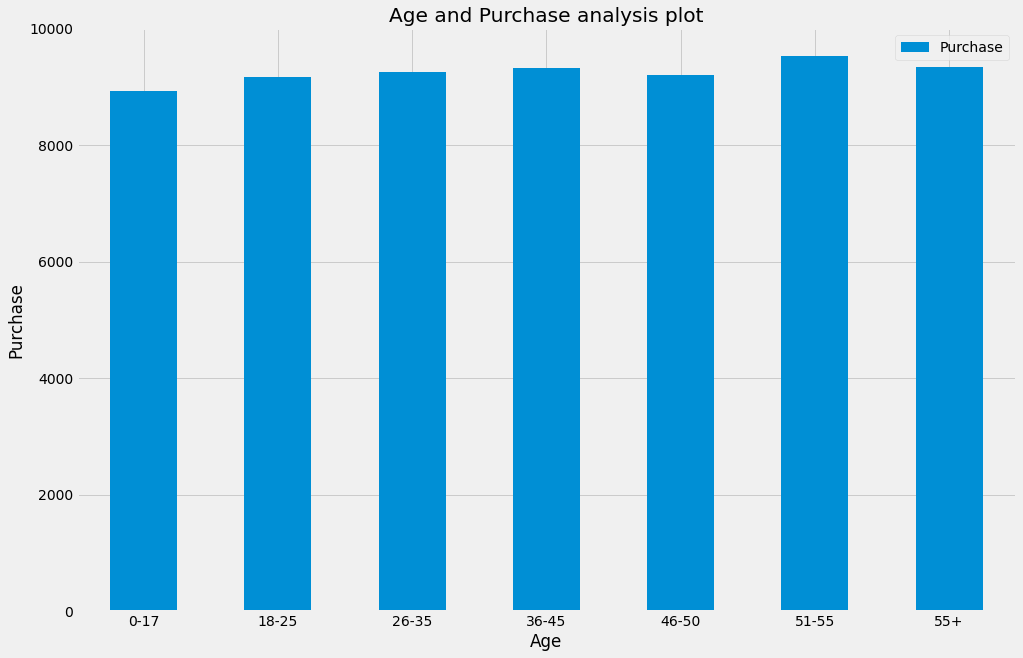

In [22]:
age_purchase =d.pivot_table(index='Age',values='Purchase',aggfunc=np.mean)
age_purchase.plot(kind='bar',figsize=(15,10))
plt.xlabel('Age')
plt.ylabel('Purchase')
plt.title('Age and Purchase analysis plot')
plt.xticks(rotation=0)
plt.show()

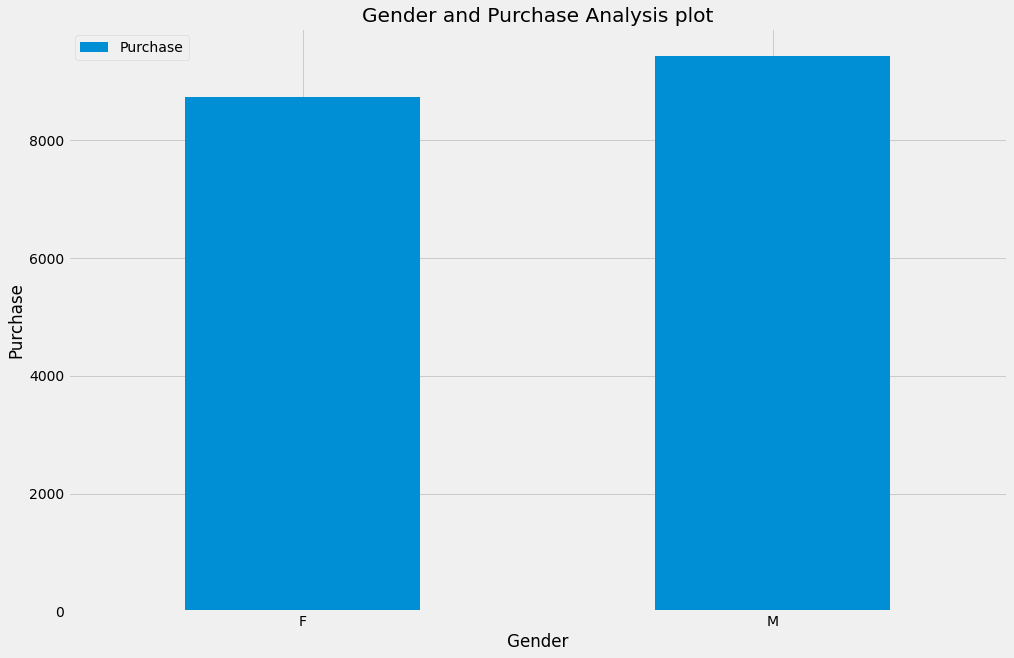

In [23]:
gender_purchase = d.pivot_table(index='Gender', values='Purchase', aggfunc=np.mean)
gender_purchase.plot(kind='bar', figsize=(15, 10))
plt.xlabel('Gender')
plt.ylabel("Purchase")
plt.title("Gender and Purchase Analysis plot")
plt.xticks(rotation=0)
plt.show()

# **Data Processing**

In [24]:
d.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [25]:
d['Product_Category_2'] = d['Product_Category_2'].fillna(-2.0).astype("float32")
d['Product_Category_3'] = d['Product_Category_3'].fillna(-2.0).astype("float32")

In [26]:
d.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [27]:
gender_dict={'F':0,'M':1}
d['Gender']=d['Gender'].apply(lambda x: gender_dict[x])
d.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,-2.0,-2.0,7969


In [28]:
cols=['Age','City_Category','Stay_In_Current_City_Years']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for x in cols:
  d[x]=le.fit_transform(d[x])
d.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,-2.0,-2.0,7969


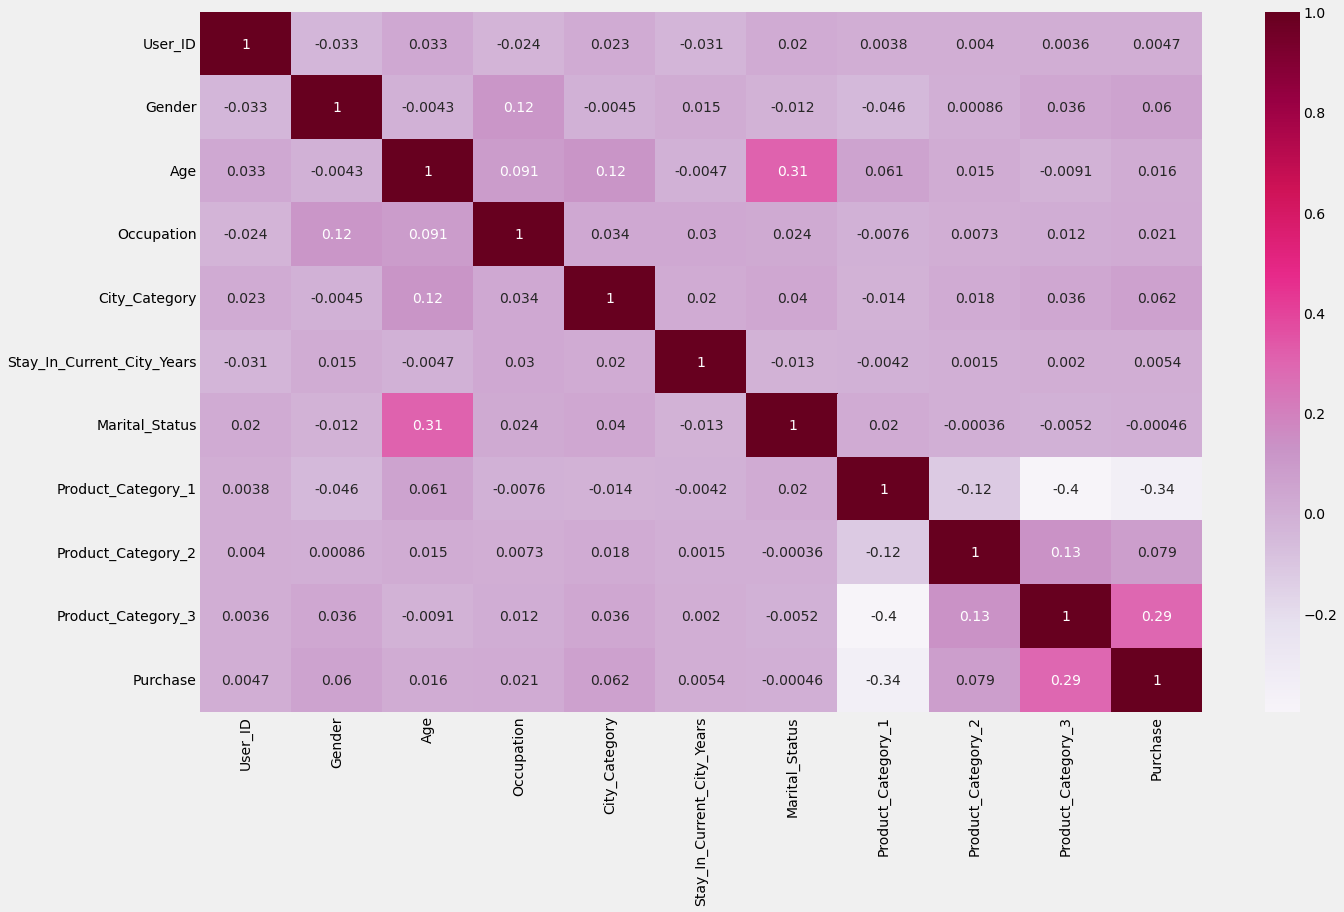

In [29]:
cor=d.corr()
plt.figure(figsize=(20,12))
sns.heatmap(cor,annot=True,cmap='PuRd')

In [30]:
X =d.drop(columns=['User_ID','Product_ID','Purchase'])
y =d['Purchase']

# **Training Models and selecting one of them**

**Creating a function for easy training of models**

In [31]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error
def train(model,X,y):
  X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.25,random_state=42)
  model.fit(X_train,y_train)
  p=model.predict(X_test)
  cv= cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=5)
  cv=np.abs(np.mean(cv))
  print("results -:")
  print("MSE :",np.sqrt(mean_squared_error(y_test,p)))
  print("CV Score :",np.sqrt(cv))

**Linear Regression**

results -:
MSE : 4617.994034201719
CV Score : 4625.252945835687


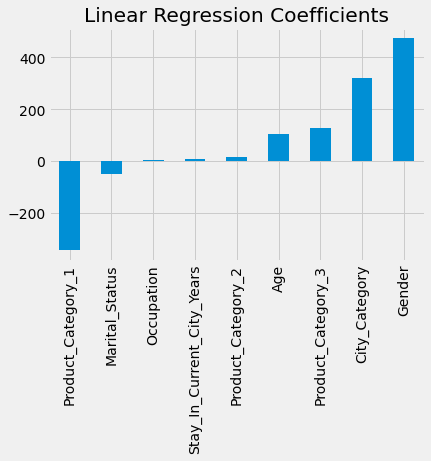

In [32]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
train(model,X,y)
cof=pd.Series(model.coef_,X.columns).sort_values()
cof.plot(kind='bar',title='Linear Regression Coefficients')

**Decision Tree**

results -:
MSE : 3368.419417403181
CV Score : 3338.730772431568


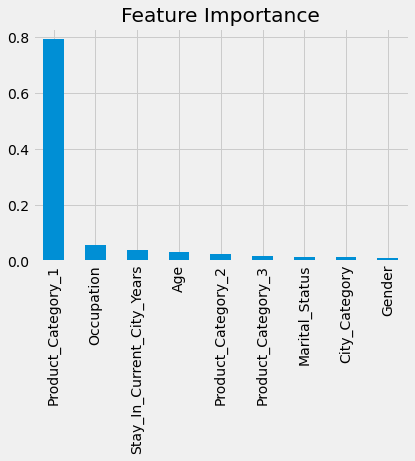

In [33]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
train(model,X,y)
f=pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)
f.plot(kind="bar",title='Feature Importance')

**Random Forest**

results -:
MSE : 3062.2446739489496
CV Score : 3051.9661145181785


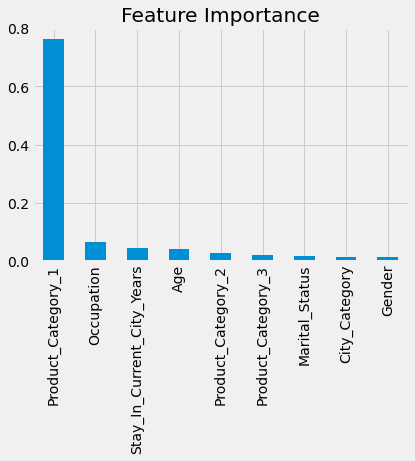

In [35]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_jobs=-1)
train(model,X,y)
f=pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)
f.plot(kind='bar',title='Feature Importance')

**Random Forest is chosen as model for predection**

# **Preparing new data for test**

In [38]:
new_data=pd.read_csv('/content/gdrive/My Drive/black_friday_test/test.csv')

In [39]:
new_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [42]:
new_data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [43]:
new_data['Product_Category_2'] = new_data['Product_Category_2'].fillna(-2.0).astype("float32")
new_data['Product_Category_3'] = new_data['Product_Category_3'].fillna(-2.0).astype("float32")

In [44]:
new_data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

In [46]:
gender_dict={'F':0,'M':1}
new_data['Gender']=new_data['Gender'].apply(lambda x: gender_dict[x])
new_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,1,46-50,7,B,2,1,1,11.0,-2.0
1,1000009,P00113442,1,26-35,17,C,0,0,3,5.0,-2.0
2,1000010,P00288442,0,36-45,1,B,4+,1,5,14.0,-2.0
3,1000010,P00145342,0,36-45,1,B,4+,1,4,9.0,-2.0
4,1000011,P00053842,0,26-35,1,C,1,0,4,5.0,12.0


In [47]:
cols=['Age','City_Category','Stay_In_Current_City_Years']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for x in cols:
  new_data[x]=le.fit_transform(new_data[x])
new_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,1,4,7,1,2,1,1,11.0,-2.0
1,1000009,P00113442,1,2,17,2,0,0,3,5.0,-2.0
2,1000010,P00288442,0,3,1,1,4,1,5,14.0,-2.0
3,1000010,P00145342,0,3,1,1,4,1,4,9.0,-2.0
4,1000011,P00053842,0,2,1,2,1,0,4,5.0,12.0


In [72]:
n_test =new_data.drop(columns=['User_ID','Product_ID'])

# **Retrainig Dataset with full train data and testing new data**

In [80]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_jobs=-1)
model.fit(X,y)
pred=model.predict(n_test)

In [81]:
result=pd.DataFrame()
result['User_ID']=new_data['User_ID']
result['Purchase']=pred



In [82]:
result.to_csv('result.csv',index=False)

# **Predection of new data**

In [83]:
result.head()

,User_ID,Purchase
0,1000004,18026.060476
1,1000009,10522.835667
2,1000010,8392.303824
3,1000010,2140.295000
4,1000011,2938.978833
